**Project objective**: Predict CLV based on customer purchase history and behavior to optimize marketing strategies and rention effort

In [32]:
import pandas as pd

df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859-1')

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Step 1: Understand the dataset**
- InvoiceNo: Invoice nunmber for each transaction.
- StockCode: Product code.
- Description: Product descroiption 
- Quantity: Number of items purchase.
- InvoiceDate: Date and time of purchase 
- UnitPrice: Price per unit.
- CustomerID: Unique customer identifier.
- Country: Customer's country.  

**Data Preprocessing**

In [34]:
# Handle Missing value in the dataset
# Check the missing value in the dataset
print(df.isnull().sum())


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [36]:
df=df.dropna(subset=['CustomerID'])

In [37]:

df=df.dropna(subset=['CustomerID'])
df['CustomerID']=df['CustomerID'].astype(int) # Convert customer ID to interger.

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [39]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [40]:
def check_column(column_name):
    has_negative=(df[column_name]<0).any()
    return has_negative
print(check_column("Quantity"))
print(check_column("UnitPrice"))

True
False


In [41]:
df=df[(df['Quantity'])>0]

In [42]:
print(check_column("Quantity"))

False


In [43]:
# Create a revenue column
df['Revenue']=df["Quantity"]*df['UnitPrice']

In [44]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


In [45]:
# Convert invoice Data
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


**Step3: Feature Engineer (RFM Analysis)**

In [47]:
# Set a Reference Data 
# Use the day after the last transaction as the reference point for recency.
reference_date=df['InvoiceDate'].max() + pd.Timedelta(days=1)
# Calcualte RFM
# Recency: Days since the customer's last purchase
# Frequency: Number of purchase (involve) percustomer.
# Monetary: Total revenue per customer.
rfm=df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days, # Recency
    'InvoiceNo':'nunique',                                   # Frequency
    'Revenue': 'sum'                                        # Monetary
}).reset_index()
rfm.columns=['CustomerID','Recency','Frequency','Monetary']

In [48]:
print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40


In [49]:
# Additional Features
# - Average order value: Total revenue divided by frequency
# - Purchase Tenure: Days between first and last purchase.

rfm['AvgOrderValue']= rfm['Monetary'] / rfm['Frequency']
tenure=df.groupby('CustomerID')['InvoiceDate'].agg(lambda x: (x.max() - x.min()).days).reset_index()
tenure.columns=['CustomerID','Tenure']
rfm=rfm.merge(tenure, on='CustomerID')

In [50]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,AvgOrderValue,Tenure
0,12346,326,1,77183.60,77183.600000,0
1,12347,2,7,4310.00,615.714286,365
2,12348,75,4,1797.24,449.310000,282
3,12349,19,1,1757.55,1757.550000,0
4,12350,310,1,334.40,334.400000,0


***Handle skewness***:
- Apply log transformation to Monetary and AvgOrdervalue to reduce skewness (similar to your preprocessing on Apr 10, 2025)

In [51]:
import numpy as np
rfm['Log_Monetary']=np.log1p(rfm['Monetary'])
rfm['Log_AvgOrderValue']=np.log1p(rfm['AvgOrderValue'])

**Calculate Historical CLV**

In [52]:
# Target variable
rfm['CLV']=rfm['Monetary']

In [53]:
# Train a Gradient Boosting Model

# Prepare Feature and Target
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Features: Recency, Frequency, Log_Monetary, Log_AvgOrderValue, Tenure
X = rfm[['Recency', 'Frequency', 'Log_Monetary', 'Log_AvgOrderValue', 'Tenure']]
y = rfm['CLV']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train model
# Intailize and train XGBoost
model=XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [55]:
# Predict the Evaluate
from sklearn.metrics import r2_score, mean_absolute_error

# Predict 
y_pred=model.predict(X_test)

# Evaluate
r2= r2_score(y_test,y_pred)
mae= mean_absolute_error(y_test, y_pred)
print(f'R2 Score: {r2:.4f}')
print(f'MAE: {mae:.2f}')

R2 Score: 0.9567
MAE: 116.23


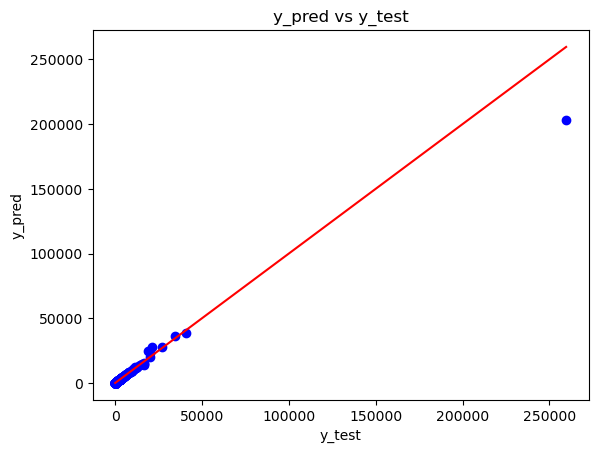

In [56]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot is good for prediction comparison
plt.title("y_pred vs y_test")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Optional: ideal line
plt.show()


**Visualize Results with Plotly**

In [57]:
# CLV Distribution:
import plotly.express as px
fig=px.histogram(rfm, x='CLV',nbins=50,title='Customer Lifetime Value Distribution')
fig.update_layout(xaxis_title='CLV', yaxis_title='Count')
fig.show()

In [58]:
# Feature importance
import plotly.graph_objects as go

# Feature importance from XGBoost
importance = model.feature_importances_
features = X.columns

fig = go.Figure(data=[
    go.Bar(x=features,y=importance, marker_color='skyblue')
])
fig.update_layout(
    title='Feature Importance for CLV Prediction',
    xaxis_title='Features',
    yaxis_title='Importance'
)
fig.show()

In [59]:
# Scatter Plot (Recency vs. Monetary):

fig= px.scatter(rfm, x='Recency', y='Monetary', color='Frequency',
                title='Recency vs. Monetary Value by Frequency ',
                labels={'Recency': 'Days Since Last Purchase', 'Monetary':'Total_Revenue'})
fig.show()


In [60]:
# Save the model
import joblib
joblib.dump(model, 'clv_model.pkl')

['clv_model.pkl']